<a href="https://colab.research.google.com/github/Cristian1308/Project-Machine-Learning/blob/main/Analisis_exploratorio_con_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se importan las librerías necesarias: pandas para manejo de datos, xgboost para el modelo de clasificación y matplotlib para visualización.

In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

Se carga el dataset desde Google Drive.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Exploratorio/card_transdata.csv")

Se separan las variables predictoras (X) y la variable objetivo (y), que indica si la transacción es fraudulenta.

In [4]:
X = df.drop("fraud", axis=1)
y = df["fraud"]

Se crea y entrena un modelo XGBoost Classifier.

In [9]:
modelo_xgb = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
modelo_xgb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Se obtienen las importancias de las características y sus nombres.

In [10]:
importancias = modelo_xgb.feature_importances_
nombres = X.columns

Se crea un DataFrame ordenado con el porcentaje de importancia de cada variable.

In [11]:
df_importancias = pd.DataFrame({
    "Variable": nombres,
    "Importancia (%)": importancias * 100
}).sort_values(by="Importancia (%)", ascending=False)

Se genera un gráfico de barras horizontales con las importancias de cada variable.

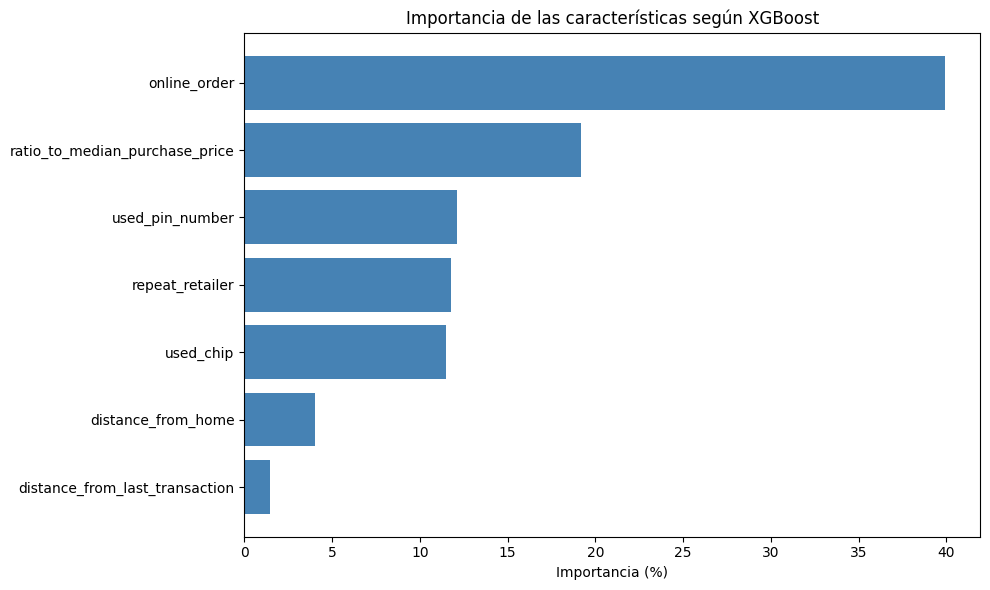

In [12]:
plt.figure(figsize=(10, 6))
plt.barh(df_importancias["Variable"], df_importancias["Importancia (%)"], color="steelblue")
plt.xlabel("Importancia (%)")
plt.title("Importancia de las características según XGBoost")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Se imprime la tabla ordenada con las importancias de las variables.

In [13]:
print(df_importancias)

                         Variable  Importancia (%)
6                    online_order        39.922352
2  ratio_to_median_purchase_price        19.204849
5                 used_pin_number        12.093973
3                 repeat_retailer        11.797950
4                       used_chip        11.463665
0              distance_from_home         4.043015
1  distance_from_last_transaction         1.474194
